In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [36]:
data = pd.read_excel('/content/iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
data['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Pre-Processing**

Missing values

In [41]:
#Finding null values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [42]:
col=['SL','SW','PL','PW']

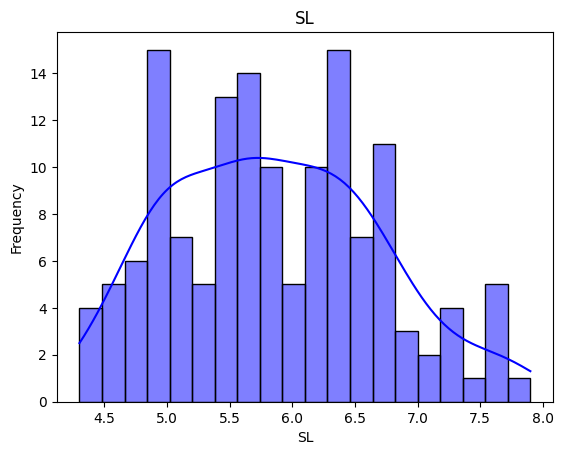

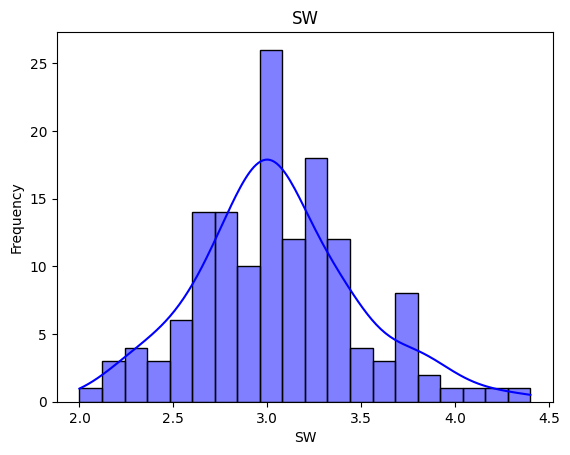

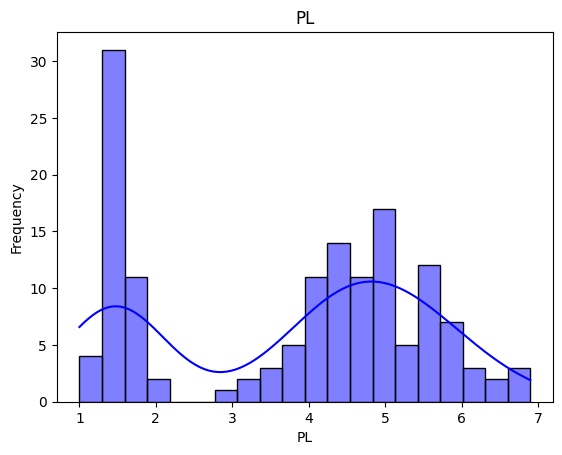

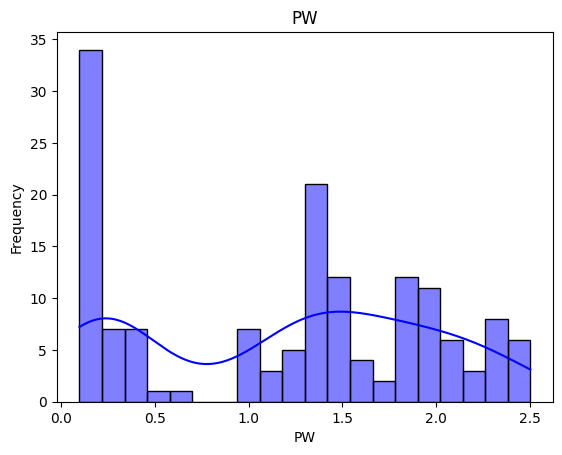

In [43]:
#Plotting histogram
for i in col:
  plt.figure()
  sns.histplot(data[i],kde=True, bins=20, color='blue')
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel('Frequency')

In [44]:
#Filling null values with median
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [45]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Outliers

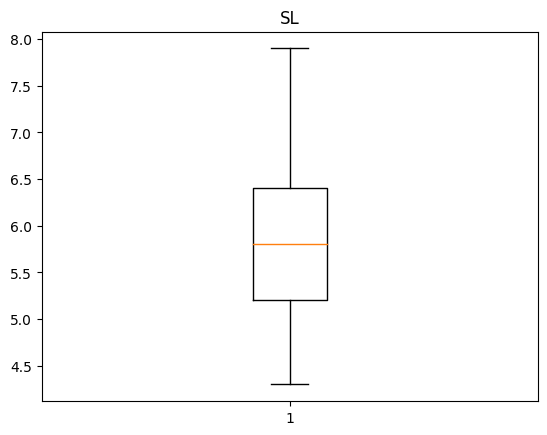

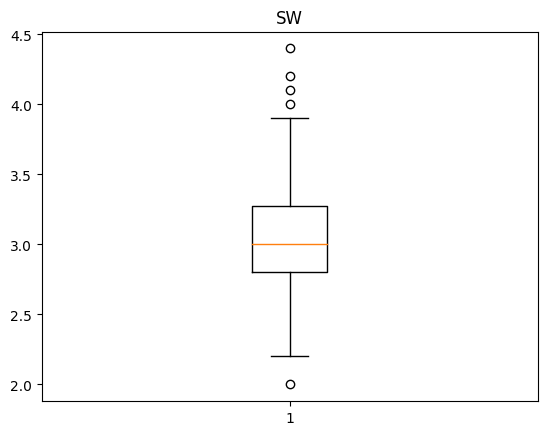

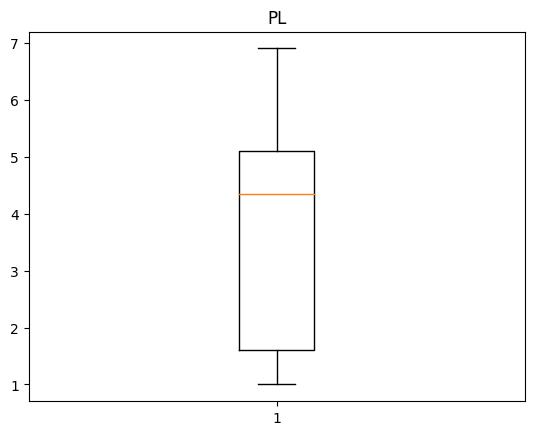

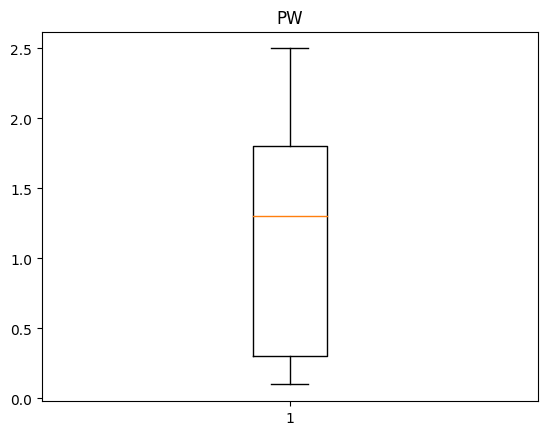

In [46]:
for i in col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

HandlIng outliers in SW

In [47]:
sw_q1 = data['SW'].quantile(0.25)
sw_q3 = data['SW'].quantile(0.75)

In [48]:
print('Q1 is',sw_q1)
print('Q3 is',sw_q3)

Q1 is 2.8
Q3 is 3.275


In [49]:
sw_IQR = sw_q3-sw_q1
print('IQR is',sw_IQR)

IQR is 0.4750000000000001


In [50]:
sw_low_lim=sw_q1-1.5*sw_IQR
sw_upp_lim=sw_q3+1.5*sw_IQR
print('Lower limit is',sw_low_lim)
print('Upper limit is',sw_upp_lim)

Lower limit is 2.0874999999999995
Upper limit is 3.9875


In [51]:
#Finding outliers
outlier=[]
for x in data['SW']:
  if((x>sw_upp_lim) | (x<sw_low_lim)):
    outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [52]:
#Capping outliers to upper limit and lower limit
data['SW'] = data['SW'].clip(lower=sw_low_lim,upper=sw_upp_lim)

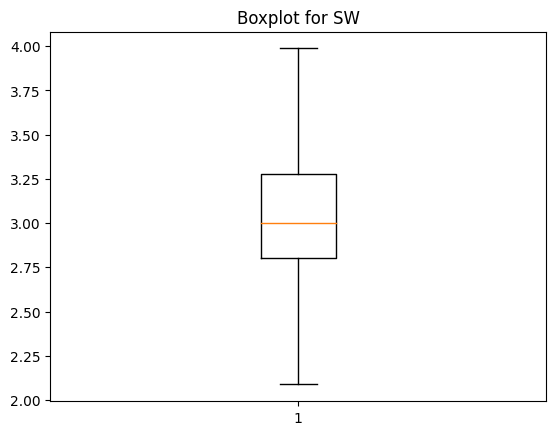

In [53]:
plt.boxplot(data['SW'])
plt.title('Boxplot for SW')
plt.show()

**Encoding**

In [54]:
#Label Encoding is used to encode target variable
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()


In [55]:
data['Classification'] = label_en.fit_transform(data['Classification'])

In [56]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


In [58]:
#spliting target variable as Classification(y) and other feaures(X)
y = data['Classification']
X = data.drop(['Classification'],axis=1)

In [59]:
X.shape

(150, 4)

In [60]:
y.shape

(150,)

In [61]:
#split the data to train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [62]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


**Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred_lr = log_model.predict(X_test)


In [64]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score


In [83]:
#Confusion matrix for logistic regression
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred_lr))

Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [66]:
#Evaluation metrices
print('Logstic Regression Accuracy is', accuracy_score(y_test, y_pred_lr))
print('Logstic Regression Precision is', precision_score(y_test, y_pred_lr,average='weighted'))
print('Logstic Regression Recall is', recall_score(y_test, y_pred_lr,average='weighted'))
print('Logstic Regression F1 Score is', f1_score(y_test, y_pred_lr,average='weighted'))

Logstic Regression Accuracy is 0.9666666666666667
Logstic Regression Precision is 0.9700000000000001
Logstic Regression Recall is 0.9666666666666667
Logstic Regression F1 Score is 0.966750208855472


**KNN** **CLASSIFIER**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.9333333333333333,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667]

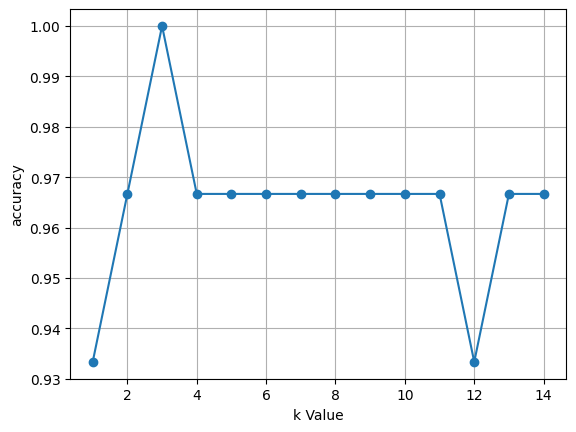

In [68]:
#plotting k vs accuracy to know which k gives maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [69]:
# maxmum accuracy at k=3

In [70]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)



In [84]:
#Confusion matrix for kNN
print('Confusion Matrix :\n ',confusion_matrix(y_test,y_pred_knn))

Confusion Matrix :
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [72]:
#Evaluation metrices
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))
print('KNN Precision is', precision_score(y_test, y_pred_knn,average='weighted'))
print('KNN Recall is', recall_score(y_test, y_pred_knn,average='weighted'))
print('KNN F1 Score is', f1_score(y_test, y_pred_knn,average='weighted'))

KNN Accuracy is 1.0
KNN Precision is 1.0
KNN Recall is 1.0
KNN F1 Score is 1.0


**Support** **Vector** **Machine**

In [73]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_pred_svm= svm_clf.predict(X_test)

In [85]:
#Confusion matrix for SVM
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_svm))

Confusion Matrix
 [[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [75]:
#Evaluation metrices
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))
print('SVM Precision is', precision_score(y_test, y_pred_svm,average='weighted'))
print('SVM Recall is', recall_score(y_test, y_pred_svm,average='weighted'))
print('SVM F1 Score is', f1_score(y_test, y_pred_svm,average='weighted'))

SVM Accuracy is 0.9333333333333333
SVM Precision is 0.9333333333333333
SVM Recall is 0.9333333333333333
SVM F1 Score is 0.9333333333333333


**Decision** **Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier
ds_clf= DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train, y_train)
y_pred_dt = ds_clf.predict(X_test)

In [86]:
#Confusion matrix for Decision Tree
print('Confusion Matrix :\n ',confusion_matrix(y_test,y_pred_dt))

Confusion Matrix :
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [78]:
#Evaluation metrices
print('Decision Tree Accuracy is', accuracy_score(y_test, y_pred_dt))
print('Decision Tree Precision is', precision_score(y_test, y_pred_dt,average='weighted'))
print('Decision Tree Recall is', recall_score(y_test, y_pred_dt,average='weighted'))
print('Decision Tree F1 Score is', f1_score(y_test, y_pred_dt,average='weighted'))

Decision Tree Accuracy is 1.0
Decision Tree Precision is 1.0
Decision Tree Recall is 1.0
Decision Tree F1 Score is 1.0


**Random** **Forest** **Classifier**

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [80]:
#Confusion matrix for Random Forest
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred_rf))

Confusion Matrix :  [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [81]:
#Evaluation metrices
print('Random Forest Accuracy is', accuracy_score(y_test, y_pred_rf))
print('Random Forest Precision is', precision_score(y_test, y_pred_rf,average='weighted'))
print('Random Forest Recall is', recall_score(y_test, y_pred_rf,average='weighted'))
print('Random Forest F1 Score is', f1_score(y_test, y_pred_rf,average='weighted'))

Random Forest Accuracy is 0.9666666666666667
Random Forest Precision is 0.9700000000000001
Random Forest Recall is 0.9666666666666667
Random Forest F1 Score is 0.966750208855472


In [87]:
#comparing accuracies of different classfiers
print('Logstic Regression Accuracy is', accuracy_score(y_test, y_pred_lr))
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))
print('Decision Tree Accuracy is', accuracy_score(y_test, y_pred_dt))
print('Random Forest Accuracy is', accuracy_score(y_test, y_pred_rf))



Logstic Regression Accuracy is 0.9666666666666667
KNN Accuracy is 1.0
SVM Accuracy is 0.9333333333333333
Decision Tree Accuracy is 1.0
Random Forest Accuracy is 0.9666666666666667


Accuracy score of KNN and Decision Tree are 100%.KNN and Decision Tree classification model gives the best result